SVM is a Constrained Optimization Algorithm

In [0]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
import numpy as np
from sklearn.preprocessing import minmax_scale

In [0]:
url = "D:/ML_dataScience/batches/ZenRays/exercises/letterdata.csv"
dataset = pandas.read_csv(url)
dataset.shape
print(dataset)


      letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
5          S     4    11      5       8      3     8     8      6      9   
6          B     4     2      5       4      4     8     7      6      6   
7          A     1     1      3       2      1     8     2      2      2   
8          J     2     2      4       4      2    10     6      2      6   
9          M    11    15     13       9      7    13     2      6      2   
10         X     3     9      5       7      4     8     7      3      8   
11         O     6    13      4       7      4     6     7      6      3   
12         G

In [0]:
print(minmax_scale(dataset.values[:,1:17]))
print(dataset.describe())

[[ 0.13333333  0.53333333  0.2        ...,  0.53333333  0.          0.53333333]
 [ 0.33333333  0.8         0.2        ...,  0.53333333  0.26666667
   0.66666667]
 [ 0.26666667  0.73333333  0.4        ...,  0.46666667  0.2         0.6       ]
 ..., 
 [ 0.4         0.6         0.4        ...,  0.8         0.13333333
   0.26666667]
 [ 0.13333333  0.2         0.26666667 ...,  0.6         0.33333333
   0.53333333]
 [ 0.26666667  0.6         0.4        ...,  0.46666667  0.13333333
   0.53333333]]
               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000   

C:\Users\smoitra.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [0]:
# Split into Train-Test
array = dataset.values
#print(array)
X = array[:,1:17]
Y = array[:,0:1]

print(X)
print(Y)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

[[2 8 3 ..., 8 0 8]
 [5 12 3 ..., 8 4 10]
 [4 11 6 ..., 7 3 9]
 ..., 
 [6 9 6 ..., 12 2 4]
 [2 3 4 ..., 9 5 8]
 [4 9 6 ..., 7 2 8]]
[['T']
 ['I']
 ['D']
 ..., 
 ['T']
 ['S']
 ['A']]


In [0]:
print(X_train)
print(Y_train)

[[3 5 6 ..., 7 2 8]
 [5 11 6 ..., 9 1 8]
 [3 1 3 ..., 8 6 9]
 ..., 
 [6 10 9 ..., 8 4 7]
 [4 7 6 ..., 8 4 6]
 [2 3 3 ..., 9 9 8]]
[['A']
 ['J']
 ['B']
 ..., 
 ['X']
 ['U']
 ['S']]


In [0]:
slack = []
slack.append(0.001)
slack.append(0.01)
slack.append(0.1)
slack.append(1)
slack.append(10)
slack.append(100)
SVmodels = []
SVMpredictions = []
SVMaccuracy = []

SVobj = SVC(C=0.001)
SVobj.fit(X_train,Y_train)
predictions = SVobj.predict(X_validation)
acc = accuracy_score(Y_validation, predictions)
SVmodels.append(SVobj)
SVMpredictions.append(predictions)
SVMaccuracy.append(acc)

SVobj = SVC(C=0.01)
SVobj.fit(X_train,Y_train)
predictions = SVobj.predict(X_validation)
acc = accuracy_score(Y_validation, predictions)
SVmodels.append(SVobj)
SVMpredictions.append(predictions)
SVMaccuracy.append(acc)

SVobj = SVC(C=0.1)
SVobj.fit(X_train,Y_train)
predictions = SVobj.predict(X_validation)
acc = accuracy_score(Y_validation, predictions)
SVmodels.append(SVobj)
SVMpredictions.append(predictions)
SVMaccuracy.append(acc)

SVobj = SVC(C=1)
SVobj.fit(X_train,Y_train)
predictions = SVobj.predict(X_validation)
acc = accuracy_score(Y_validation, predictions)
SVmodels.append(SVobj)
SVMpredictions.append(predictions)
SVMaccuracy.append(acc)
#show metrics for default SVM
print("Accuracy score of default SVM:")
print(accuracy_score(Y_validation, predictions))
print()

print("confusion_matrix of default SVM:")
print(confusion_matrix(Y_validation, predictions))
print()

print("classification_report of default SVM:")
print(classification_report(Y_validation, predictions))
print()

SVobj = SVC(C=10)
SVobj.fit(X_train,Y_train)
predictions = SVobj.predict(X_validation)
acc = accuracy_score(Y_validation, predictions)
SVmodels.append(SVobj)
SVMpredictions.append(predictions)
SVMaccuracy.append(acc)

SVobj = SVC(C=100)
SVobj.fit(X_train,Y_train)
predictions = SVobj.predict(X_validation)
acc = accuracy_score(Y_validation, predictions)
SVmodels.append(SVobj)
SVMpredictions.append(predictions)
SVMaccuracy.append(acc)

C:\Users\smoitra.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of default SVM:
0.9735

confusion_matrix of default SVM:
[[136   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 160   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 124   0   1   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 156   0   0   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 161   0   6   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   3]
 [  0   0   0   0   0 163   0   1   0   0   0   0   0   0   0   2   0   0
    1   3   0   0   0   1   0   0]
 [  0   0   0   0   2   0 154   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   1 141   0   0   3   0   0   0   0   0   0   7
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 150   8   0   0   0   

In [0]:
print("Accuracy of SVM")
print(SVMaccuracy)
print()

print("Slack for SVM")
print(slack)
print()

Accuracy of SVM
[0.03925, 0.125, 0.90425, 0.97350000000000003, 0.97650000000000003, 0.97650000000000003]

Slack for SVM
[0.001, 0.01, 0.1, 1, 10, 100]



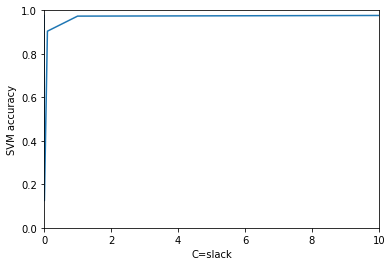

In [0]:
plt.plot(slack,SVMaccuracy)
plt.ylabel("SVM accuracy")
plt.xlabel("C=slack")
plt.ylim(0,1)
plt.xlim(0,10)
plt.show()